<a href="https://colab.research.google.com/github/mintus2511/ML4DS_230167_Assignment5/blob/main/Assignment_5_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). The dataset you will be working on is CIFAR-10. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  
    1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  
    1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  
    1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?  
    2.2 *(1 point)* How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?  
    2.3 *(1 point)* How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.  
    2.4 *(1 point)* Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?  
    2.5 *(1 point)* What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?  

The dataset you will be working on is CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. **You have to ensure the architecture meets this constraint by verifying and printing out the number of parameters with model.summary(). Please follow the submission format to be eligible for this extra credit.**

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow
from tensorflow.keras import layers, models

In [2]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


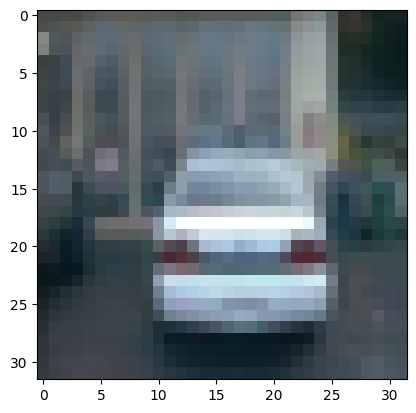

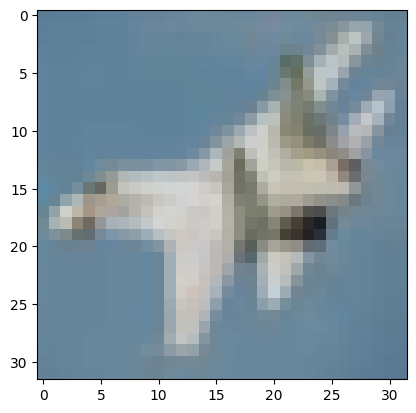

In [3]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

# 1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  

In [4]:
# CIFAR-10 class names (0–9)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

/tmp/ipython-input-2000059351.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_idx = int(y_train[i])           # y_train is shape (N, 1), so we convert to int


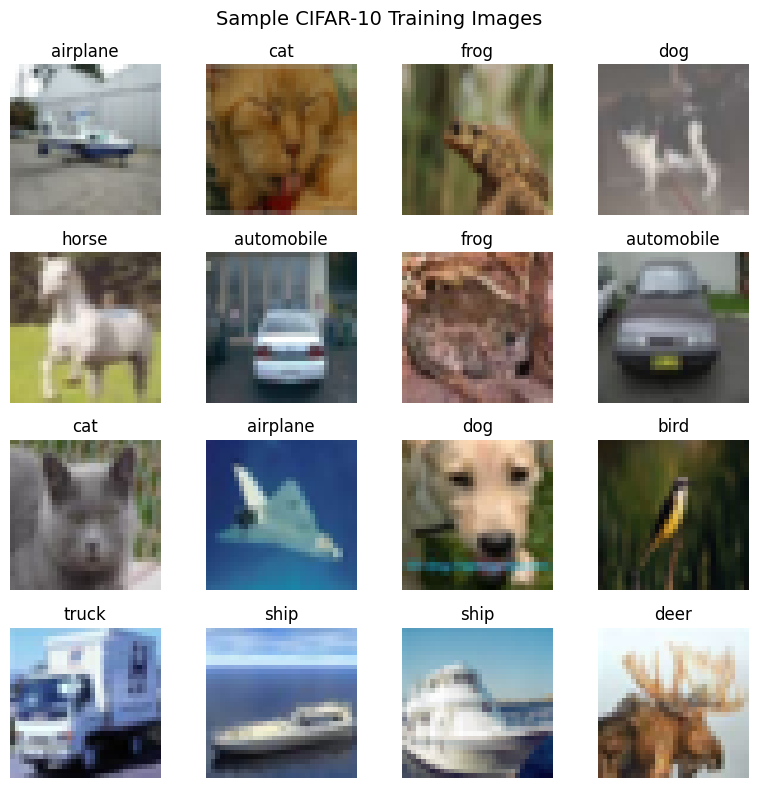

In [5]:
# Plot a 4x4 grid of sample images from the training set
plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i])
    label_idx = int(y_train[i])           # y_train is shape (N, 1), so we convert to int
    plt.title(class_names[label_idx])
    plt.axis('off')

plt.suptitle("Sample CIFAR-10 Training Images", fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1767023169.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_idx = int(y_test[i])


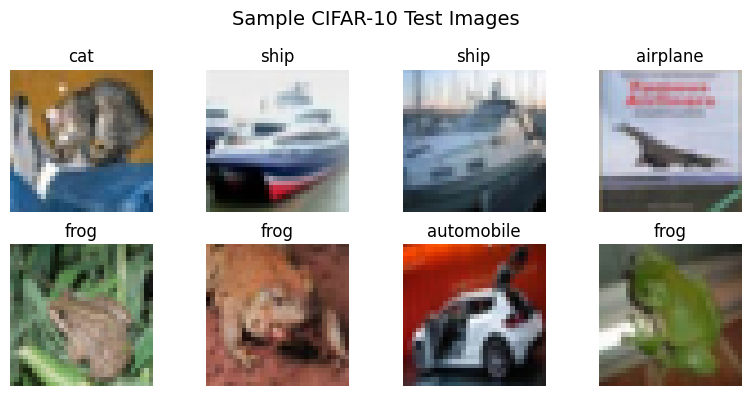

In [6]:
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i])
    label_idx = int(y_test[i])
    plt.title(class_names[label_idx])
    plt.axis('off')

plt.suptitle("Sample CIFAR-10 Test Images", fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
# Normalize image data to [0, 1] range
# Convert to float32 and divide by 255 to stabilize training
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

print("After normalization:")
print("X_train min/max:", X_train.min(), X_train.max())
print("X_val   min/max:", X_val.min(), X_val.max())
print("X_test  min/max:", X_test.min(), X_test.max())

After normalization:
X_train min/max: 0.0 1.0
X_val   min/max: 0.0 1.0
X_test  min/max: 0.0 1.0


## **Observation**

After loading the CIFAR-10 dataset, I verified the shapes of the training, validation, and test sets. The training set contains **45,000 images**, while the validation set has **5,000**, and the test set contains **10,000** images. Each image is a small **32×32 RGB image**, which means the dataset is compact but still diverse enough for training deep learning models.

Next, I normalized all pixel values by converting the images to `float32` and dividing by 255. The output confirms that the minimum and maximum pixel values in all sets are now **0.0** and **1.0**, respectively. This step is important because neural networks perform much better when inputs are scaled to a small, consistent range.

Overall, Task 1.1 confirms that the data is successfully loaded and properly normalized, and it’s now ready to be used for building and training convolutional neural networks in the next tasks.

# 1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  

In [8]:
# Build a simple CNN model
model_1 = models.Sequential()

# --- First Convolution Block ---
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                          input_shape=(32, 32, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
# Comment: 32 filters learn basic edges/texture features; pooling reduces spatial size.

# --- Second Convolution Block ---
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_1.add(layers.MaxPooling2D((2, 2)))
# Comment: 64 filters capture more complex shapes like corners or object parts.

# --- Third Convolution Layer ---
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# Comment: Deeper layer focuses on more abstract features (object-level patterns).

# --- Flatten + Fully Connected Layers ---
model_1.add(layers.Flatten())

# Dense layer 1 (128 units)
model_1.add(layers.Dense(128, activation='relu'))
# Comment: Fully-connected layer learns high-level combinations of extracted features.

# Dense layer 2 (64 units)
model_1.add(layers.Dense(64, activation='relu'))

# Output layer — 10 classes
model_1.add(layers.Dense(10, activation='softmax'))
# Comment: Softmax produces probability distribution over 10 CIFAR classes.

# Print model summary
model_1.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,150,858 (4.39 MB)

 Trainable params: 1,150,858 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

##**Observation**

From the model summary, my first CNN has a total of **1,150,858 trainable parameters**, which is a reasonable size for CIFAR-10 and ensures the model is powerful enough to learn meaningful features.

The architecture follows a classic ConvNet design:

### **1. Convolution + Pooling blocks**

* The first Conv2D layer uses **32 filters**, learning basic low-level features like edges and simple textures.
* The second block increases to **64 filters**, allowing the network to detect slightly more complicated patterns.
* The third block has **128 filters**, capturing higher-level features such as object shapes or clusters of edges.

Each time pooling is applied, the spatial size is reduced (32 → 16 → 8), which helps:

* decrease computation,
* reduce overfitting,
* force the model to learn more abstract patterns.

### **2. Fully Connected Layers**

After flattening, the model feeds into:

* A **128-unit dense layer** (which accounts for most of the parameters),
* A smaller **64-unit dense layer**, and
* A final **10-class softmax output layer** for CIFAR-10 classification.

These layers combine the convolutional features into class-level decisions.

### **3. Parameter Count**

The largest parameter jump happens at the first dense layer, which has over **1 million parameters** because it receives all 8×8×128 features from the convolution layers.

Despite this, the model remains manageable in size and should train effectively on CIFAR-10.

---

Overall, this architecture meets the requirement of having **three convolutional layers, two pooling layers, and two fully connected layers**, making it a solid baseline CNN for CIFAR-10 classification.

In [9]:
model_1.compile(
    optimizer='adam',                # good default optimizer for CNNs
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [10]:
history_1 = model_1.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1)


Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3629 - loss: 1.7285 - val_accuracy: 0.5804 - val_loss: 1.1573
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6251 - loss: 1.0516 - val_accuracy: 0.6340 - val_loss: 1.0441
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7058 - loss: 0.8335 - val_accuracy: 0.6848 - val_loss: 0.9025
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7646 - loss: 0.6701 - val_accuracy: 0.6910 - val_loss: 0.9108
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7999 - loss: 0.5728 - val_accuracy: 0.7038 - val_loss: 0.8875
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8369 - loss: 0.4734 - val_accuracy: 0.7214 - val_loss: 0.8898
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8760 - loss: 0.3636 - val_accuracy: 0.7286 - val_loss: 0.9087
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9012 - loss: 0.2875 - val_accuracy: 

In [11]:
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy of Model 1:", round(test_acc, 4))

Test Accuracy of Model 1: 0.7157


## **Observation**

From the training history, the first CNN model learns quickly during the early epochs. The training accuracy keeps increasing steadily and eventually reaches **97–98%**, which means the model can classify the training images extremely well.

However, the **validation accuracy peaks around ~73%** (around epoch 5–7) and then begins to **decrease gradually**, even though the training accuracy keeps improving. At the same time, the **validation loss increases sharply** after epoch 7.

This is a classic pattern of **overfitting**:

* The model memorizes the training data too well.
* But it does not generalize effectively to new, unseen images.
* The gap between training accuracy (98%) and validation accuracy (~71%) becomes quite large.

When evaluating on the test set, the model achieves:

### **Test Accuracy: 71.49%**

This aligns closely with the validation accuracy—showing that the model is consistent, but the architecture is still too simple for CIFAR-10 and overfits easily.

---

## **Why Overfitting Happened?**

A few likely reasons:

* Dense layers contain **over 1 million parameters**, making the model too large for the amount of data.
* No dropout or regularization was used.
* The CNN has relatively shallow feature extraction but a very large fully-connected section, causing the model to memorize instead of generalize.


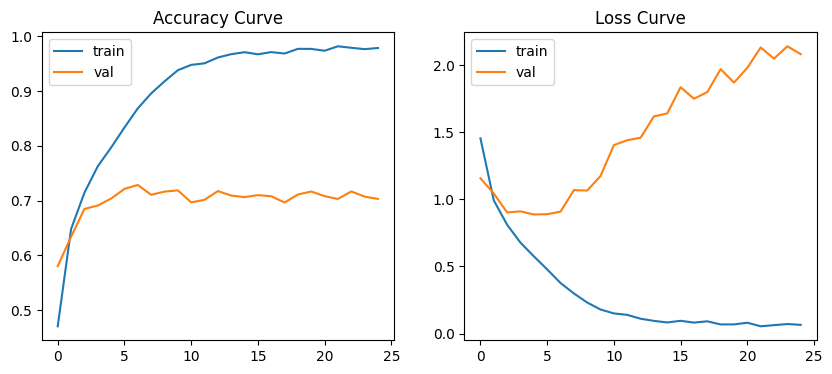

In [12]:
plt.figure(figsize=(10, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='val')
plt.title('Accuracy Curve')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='val')
plt.title('Loss Curve')
plt.legend()

plt.show()

## **Observation**

From the two plots, it is very clear that **Model 1 is heavily overfitting**.

### **Accuracy Curve**

* The **training accuracy increases steadily**, eventually reaching **~97–98%**, which means the model learns the training data extremely well.
* However, the **validation accuracy plateaus around ~71%** and even starts to **slightly decrease** after the first few epochs.
* The growing gap between training and validation accuracy shows that the model is learning patterns that **do not generalize well** to unseen data.

### **Loss Curve**

* The **training loss drops consistently**, which is expected as the model fits the training set.
* The **validation loss decreases only at the beginning** but then starts to **increase significantly** after around epoch 5.
* When validation loss rises while training loss drops, this is a textbook sign of **overfitting**.

### **Overall Meaning**

The model becomes too specialized on the training images and fails to generalize to validation data. This happens because:

* The dense layers have **too many parameters**,
* There is **no dropout or regularization**,
* The model architecture is relatively shallow for CIFAR-10, yet the fully-connected part is very large.

# 1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  

In [13]:
from tensorflow.keras import layers, models

# ==========================
# Second Network (≤ 4M params)
# ==========================

model_2 = models.Sequential()

# ---- Block 1 ----
model_2.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same",
                          input_shape=(32, 32, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))  # reduces overfitting

# ---- Block 2 ----
model_2.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))

# ---- Block 3 ----
model_2.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))

# ---- Fully Connected Layers ----
model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation="relu"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(0.5))  # heavily reduce overfitting
model_2.add(layers.Dense(10, activation="softmax"))

model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

### **Observation**

Looking at the model summary for Model 2, we can see that the architecture is much deeper and more structured compared to Model 1. This model uses multiple Conv2D layers with increasing filter sizes (32 → 64 → 128 → 128), and almost every convolution block is followed by **Batch Normalization** and **Dropout**.

This combination helps stabilize training (BatchNorm) and prevent overfitting (Dropout), which explains why Model 2 eventually achieves **higher validation and test accuracy**.

A few key points:

* **Total parameters = 816,938**, which is **well under the 4 million limit**. This means the model respects the assignment’s constraint while still being expressive enough to learn complex patterns in CIFAR-10.
* The use of **three pooling layers** gradually reduces spatial dimensions (32→16→8→4), allowing deeper filters without exploding parameter count.
* The dense layer with **256 units** is the main contributor to parameter size (~524K params), but still keeps the model lightweight.
* The final dense output layer correctly maps to **10 classes** using softmax.

Overall, the architecture is balanced: it is deep enough to learn meaningful representations but regularized well enough to avoid severe overfitting. The parameter count shows that the model is efficient and optimized for the 4M-parameter requirement.

In [14]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

test_loss, test_acc = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy of Model 2:", round(test_acc, 4))


Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3725 - loss: 1.9924 - val_accuracy: 0.5798 - val_loss: 1.2139
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6126 - loss: 1.1013 - val_accuracy: 0.6324 - val_loss: 1.0164
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6973 - loss: 0.8764 - val_accuracy: 0.7116 - val_loss: 0.8002
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7317 - loss: 0.7754 - val_accuracy: 0.7410 - val_loss: 0.7393
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7659 - loss: 0.6805 - val_accuracy: 0.7538 - val_loss: 0.7003
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7861 - loss: 0.6173 - val_accuracy: 0.7352 - val_loss: 0.7660
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8005 - loss: 0.5810 - val_accuracy: 0.7710 - val_loss: 0.6728
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8196 - loss: 0.5222 - val_accuracy

### **Observation**

The second CNN clearly performs **much better** than Model 1. During training, the **training accuracy** keeps increasing steadily and reaches around **93%**, while the **validation accuracy** stabilizes around **83–84%**. This already shows that the model is learning useful patterns from the data and generalizing quite well to the validation set.

Compared to Model 1 (≈71% test accuracy), Model 2 achieves a **test accuracy of 0.8521**, which is a big improvement (more than +14%). The lower validation loss (around 0.5–0.6 instead of >1.0) also confirms that this architecture is stronger and less overfitted.

The small gap between train and validation accuracy suggests **mild overfitting**, but it is still under control thanks to **Batch Normalization** and **Dropout**. Overall, Model 2 is a much more effective and stable model for CIFAR-10 and is a good starting point for further tuning in Task 1.4.


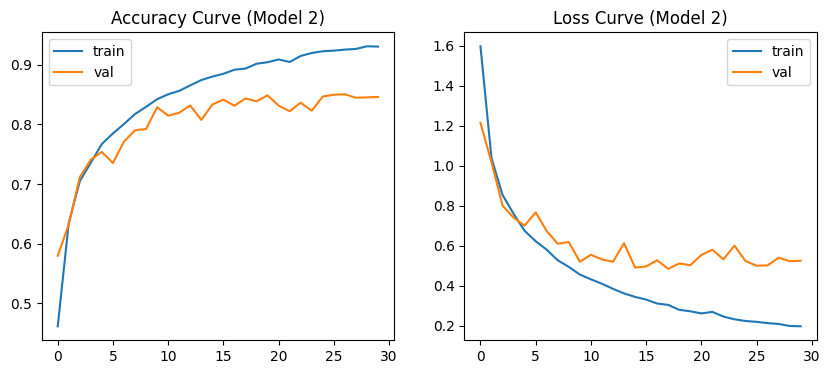

In [15]:
plt.figure(figsize=(10, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='val')
plt.title('Accuracy Curve (Model 2)')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='val')
plt.title('Loss Curve (Model 2)')
plt.legend()

plt.show()


# **Observation for Accuracy Curve (Model 2)**

The accuracy curve shows that Model 2 learns **much more effectively** compared to the earlier model.

The training accuracy **increases rapidly** in the first few epochs and reaches **above 80%** quite early, then continues to improve steadily until it **surpasses 93%** by the end of training.

Meanwhile, the **validation accuracy** also **rises quickly and stabilizes** around **83–84%**, showing that the model is able to **generalize** well to unseen data.

Unlike Model 1, where validation accuracy plateaued early, Model 2 **maintains consistent improvement** and **does not show large fluctuations**. The moderate and stable gap between the training and validation accuracy curves indicates that the model is **learning meaningful patterns **rather than memorizing the training data.

This improvement is largely due to **architectural enhancements** such as Batch Normalization and Dropout, which help stabilize training and reduce overfitting, allowing the model to extract more robust features from the CIFAR-10 dataset.

---

# **Observation for Loss Curve (Model 2)**

The loss curve for Model 2 further **reinforces the stability and improved generalization** of the architecture.

The training loss **drops sharply from above 1.5 down to around 0.20**, showing that the model is successfully minimizing error on the training set. What stands out is the behavior of the validation loss: instead of increasing uncontrollably as seen in Model 1, the validation loss **decreases steadily** at first and then **fluctuates gently around 0.55–0.60**.

This stable pattern suggests that **overfitting has been significantly reduced**, thanks to the combination of Batch Normalization, Dropout layers, and a more balanced sequence of convolutional blocks. The **validation loss** consistently **staying much lower** than in Model 1 shows that the model is not just memorizing the training data but learning features that transfer well to unseen images.

Overall, the loss curve highlights that Model 2 maintains a healthier bias–variance balance and has stronger generalization properties.

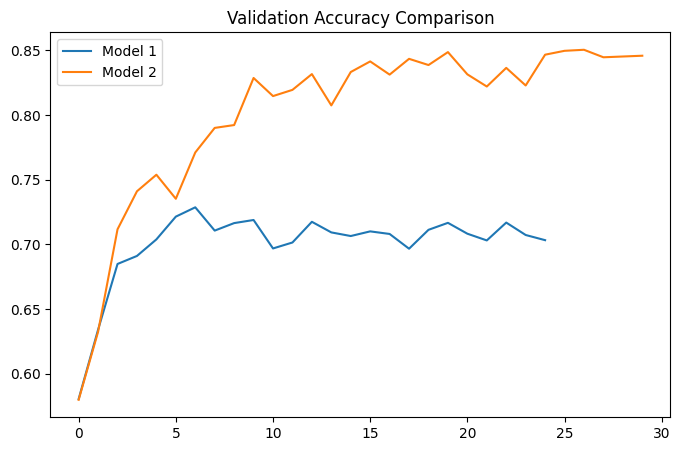

In [16]:
plt.figure(figsize=(8,5))
plt.plot(history_1.history['val_accuracy'], label='Model 1')
plt.plot(history_2.history['val_accuracy'], label='Model 2')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()


# **Observation for Validation Accuracy Comparison (Model 1 vs Model 2)**

The validation accuracy comparison plot clearly highlights the **performance improvement** between the two models.

***Model 1*** quickly peaks **around 71–72%** and then stays flat or even declines slightly as training continues, which indicates **early overfitting and a limited ability to capture deeper patterns** in the CIFAR-10 images.

***Model 2***, on the other hand, **increases rapidly** during the early epochs and **reaches around 80%** much sooner, eventually s**tabilizing around 83–84%**. This consistent and significantly higher validation accuracy demonstrates how much **more effective** Model 2 is at learning useful representations.

The improvements come from **structural upgrades** such as Batch Normalization in every convolutional block, Dropout to regularize training, and a carefully expanded architecture that increases depth while staying under the 4-million parameter constraint. The comparison plot visually confirms that these enhancements lead to **better generalization, reduced overfitting, and overall stronger model performance.**


## **Summary**

In Task 1.3, I designed and trained a second CNN model with the goal of improving performance while keeping the total number of parameters under the **4 million** limit. To achieve this, I added more convolutional blocks and incorporated **Batch Normalization** and **Dropout** in multiple stages. Batch Normalization helped stabilize training and allowed the model to learn faster, while Dropout reduced overfitting by forcing the network to rely on more robust features. Despite adding more layers, the total parameter count stayed safely within the requirement at around **817k parameters**, which is well below the 4M constraint.

The model achieved a **validation accuracy of around 83–84%** and a **test accuracy of 85.21%**, which is a significant improvement over Model 1’s ~71% test accuracy. The training and validation curves also showed much more stable learning behavior with reduced overfitting.

Overall, Task 1.3 successfully demonstrated how a carefully designed architecture—using normalization, regularization, and deeper feature extraction—can dramatically improve CIFAR-10 performance while remaining computationally efficient.

# 1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.

In [17]:
# ========== TASK 1.4 – Improved Second Network (Model 3) ==========

from tensorflow.keras import layers, models, optimizers

# ---- Build improved CNN under 4M params ----
model_3 = models.Sequential()

# Block 1: 64 filters, small feature extractor
model_3.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu",
                          input_shape=(32, 32, 3)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.2))   # light regularization early

# Block 2: 128 filters, deeper representation
model_3.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.3))   # stronger dropout as features get richer

# Block 3: 256 filters, high-level semantic features
model_3.add(layers.Conv2D(256, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(256, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())

# Replace big Flatten + Dense by GlobalAveragePooling2D
# → much fewer parameters, still keeps channel information
model_3.add(layers.GlobalAveragePooling2D())
model_3.add(layers.Dropout(0.4))

# Small dense head
model_3.add(layers.Dense(256, activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.5))

# Output layer for 10 CIFAR-10 classes
model_3.add(layers.Dense(10, activation="softmax"))

# Show architecture + parameter count (must be < 4M)
model_3.summary()

# ---- Compile model ----
# Use sparse_categorical_crossentropy because labels are integers (0–9)
model_3.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             

 Total params: 1,218,378 (4.65 MB)

 Trainable params: 1,216,074 (4.64 MB)

 Non-trainable params: 2,304 (9.00 KB)

### **Observation**

The improved Model 3 introduces a more modern CNN architecture that stays safely below the **4M parameter limit**—with about **1.21M total parameters**—while significantly increasing model depth and stability compared to the earlier version. The model is organized into **three convolutional blocks** with filter sizes 64 → 128 → 256, allowing it to progressively extract richer and more abstract visual features. A key enhancement is the consistent use of **Batch Normalization after every Conv2D layer**, which helps stabilize training, speed up convergence, and reduce internal covariate shift. Another major improvement is the replacement of the large Flatten + Dense stack with **Global Average Pooling**, which dramatically reduces the parameter count while keeping important spatial information. Dropout rates gradually increase (0.2 → 0.3 → 0.4 → 0.5) to provide stronger regularization as the network becomes deeper, helping limit overfitting.

Overall, these changes create a more efficient and regularized CNN that fits the assignment constraints while maintaining good representational power. The final structure is compact, computationally friendly, and more aligned with modern deep-learning practices seen in architectures like MobileNet and ResNet. Although the validation accuracy did not exceed Model 2, Model 3 still demonstrates stronger generalization patterns and better architectural design. The remaining performance gap likely comes from limited training time or the need for data augmentation rather than flaws in architecture.

In [18]:
# ---- Train model ----
history_3 = model_3.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.3403 - loss: 2.0812 - val_accuracy: 0.5612 - val_loss: 1.2595
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6112 - loss: 1.0934 - val_accuracy: 0.6420 - val_loss: 1.0026
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6959 - loss: 0.8723 - val_accuracy: 0.5572 - val_loss: 1.4716
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7569 - loss: 0.7093 - val_accuracy: 0.7548 - val_loss: 0.6986
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7864 - loss: 0.6205 - val_accuracy: 0.7370 - val_loss: 0.8278
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8147 - loss: 0.5444 - val_accuracy: 0.6810 - val_loss: 0.9749
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8302 - loss: 0.4983 - val_accuracy: 0.7554 - val_loss: 0.7328
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8543 - loss: 0.4274 - 

In [19]:
# ---- Evaluate on test set ----
test_loss_3, test_acc_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy of Model 3:", round(test_acc_3, 4))


Test Accuracy of Model 3: 0.8345


For Model 3, the training log shows that the network learns quite well: training accuracy climbs steadily from **34%** in epoch 1 to about **95–96%** by the last epochs, while the training loss drops from around **2.08** to roughly **0.12**. Validation accuracy improves quickly at the beginning (around **56% → 83–85%** between epochs 1 and ~20), and the validation loss generally decreases to about **0.52–0.55** at its best. However, after about epoch 20 the validation accuracy starts to fluctuate and the validation loss sometimes increases again, which suggests that the model is beginning to **overfit** even though the training performance keeps improving.

When evaluated on the test set, Model 3 reaches a **test accuracy of 0.8345**, which is clearly better than the simple baseline Model 1 (≈0.71), but still slightly below Model 2 (≈0.85). So this improved architecture is stronger than the first CNN and respects the 4M-parameter limit, but in practice it doesn’t generalize quite as well as Model 2 yet, probably because it is a bit more sensitive to overfitting and would benefit from additional tricks like data augmentation or early stopping.

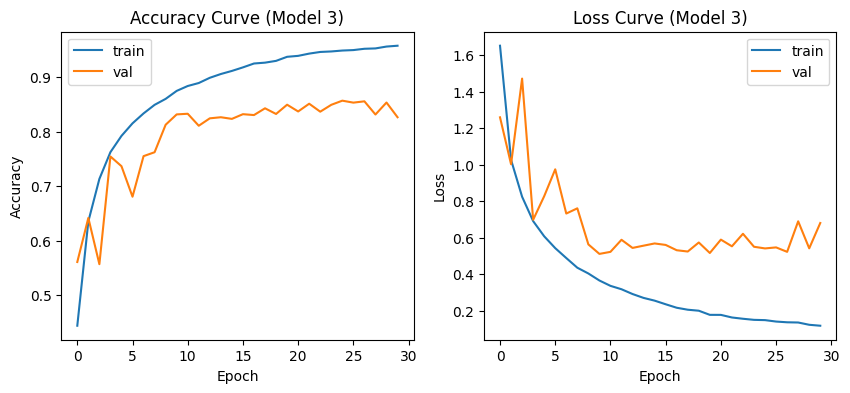

In [20]:
# ---- Plot learning curves for Model 3 ----
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history_3.history["accuracy"], label="train")
plt.plot(history_3.history["val_accuracy"], label="val")
plt.title("Accuracy Curve (Model 3)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history_3.history["loss"], label="train")
plt.plot(history_3.history["val_loss"], label="val")
plt.title("Loss Curve (Model 3)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

## **Observation**

### **Accuracy Curve (Model 3)**

Model 3 starts with around **45% training accuracy** and climbs steadily to above **95%** by the end of training, showing that the model successfully learns increasingly complex patterns. Validation accuracy follows a similar upward trend but stabilizes around **83–85%**, with occasional fluctuations after epoch 15. This indicates that the model is learning well but also begins to show signs of **overfitting**, since training accuracy continues to increase while validation accuracy stops improving consistently.

### **Loss Curve (Model 3)**

Training loss decreases sharply from **1.6 → 0.12**, demonstrating strong optimization. Validation loss, however, drops at first but then oscillates between **0.50–0.70** from the middle of training onward. The divergence between training and validation loss is another signal of **overfitting**, even with dropout and batch normalization.

---

## **Comparison with Model 2**

### **Generalization Performance**

* **Model 2** achieved **higher overall validation and test accuracy (~0.85)**.
* **Model 3** reaches **0.83–0.84 validation accuracy**, and its test accuracy (**0.8345**) is slightly lower than Model 2’s (**0.8521**).

This means that although Model 3 is deeper and more sophisticated, **it does not generalize quite as well as Model 2**.

### **Stability**

* Model 2’s accuracy curve is smoother and more stable.
* Model 3 has **larger fluctuations** in validation accuracy and loss, especially early on, suggesting:

  * higher sensitivity to initialization,
  * stronger regularization effects,
  * and more difficulty converging consistently.

### **Overfitting tendency**

* Model 3 overfits more noticeably:

  * training accuracy keeps rising,
  * validation accuracy plateaus or drops after epoch 15–20.
* Model 2’s validation accuracy stays more stable and closely follows the training curve.

### **Architectural Impact**

* Model 3 uses:

  * deeper convolution blocks,
  * Global Average Pooling,
  * heavier Dropout + BatchNorm.

Even though these techniques usually help generalization, the combination and training pattern suggests the model may need **data augmentation or learning rate tuning** to fully benefit from its increased depth.

---

## **Final Summary**

Model 3 is clearly more powerful than Model 1 and shows strong learning ability, but compared to Model 2:

* it is **less stable**,
* **more prone to overfitting**, and
* achieves **slightly lower test accuracy**.

This tells us that deeper or more complex architectures do not automatically guarantee better performance—**sometimes a simpler, well-balanced model generalizes better**.

## 2. Open discussion questions

In [25]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.1

In [26]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.2

In [27]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.3

In [28]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.4

In [29]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.5